In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [14]:
N = 30  # Número de dias
mu = 100  # Média da demanda diária
sigma = 20  # Desvio padrão da demanda diária 
c_storeage = 1  # Custo de armazenagem por unidade
c_order = 50  # Custo de pedido
c_shortage = 10  # Custo de falta por unidade

In [15]:
def generate_demand():
    return max(0, np.random.normal(mu, sigma))

In [16]:
def calculate(estoque_inicial, demanda_diaria):
    estoque = estoque_inicial
    custo_total = 0
    for demanda in demanda_diaria:
        if estoque >= demanda:
            custo_total += c_storeage * estoque  # Custo de armazenagem
            estoque -= demanda
        else:
            custo_total += c_shortage * (demanda - estoque)  # Custo de falta
            estoque = 0
    return custo_total

In [17]:
def forca_bruta():
    melhores_resultados = []
    menor_custo = float('inf')
    
    for estoque_inicial in range(1, 201):
        demanda_diaria = np.random.normal(mu, sigma, N).astype(int)
        custo = calcular_custo(estoque_inicial, demanda_diaria)
        if custo < menor_custo:
            menor_custo = custo
            melhores_resultados.append((estoque_inicial, custo))
    return min(melhores_resultados, key=lambda x: x[1])

In [18]:
def dividir_para_conquistar(n):
    if n <= 1:
        return forca_bruta()
    else:
        meio = n // 2
        left = dividir_para_conquistar(meio)
        right = dividir_para_conquistar(n - meio)
        return min(left, right, key=lambda x: x[1])

In [19]:
def recursao_com_memoizacao(n, estoque_inicial):
    if n == 0:
        return 0
    demanda = int(np.random.normal(mu, sigma))
    if estoque_inicial >= demanda:
        custo = c_shortage * estoque_inicial + recursao_com_memoizacao(n - 1, estoque_inicial - demanda)
    else:
        custo = c_shortage * (demanda - estoque_inicial) + recursao_com_memoizacao(n - 1, 0)
    return custo


In [20]:
def memoization():
    melhores_resultados = []
    menor_custo = float('inf')
    for estoque_inicial in range(1, 201):
        custo = recursao_com_memoizacao(N, estoque_inicial)
        if custo < menor_custo:
            menor_custo = custo
            melhores_resultados.append((estoque_inicial, custo))
    return min(melhores_resultados, key=lambda x: x[1])


In [21]:
def monte_carlo(simulacoes=1000):
    melhores_resultados = []
    menor_custo = float('inf')
    for estoque_inicial in range(1, 201):
        custos_simulacao = []
        for _ in range(simulacoes):
            demanda_diaria = np.random.normal(mu, sigma, N).astype(int)
            custo = calcular_custo(estoque_inicial, demanda_diaria)
            custos_simulacao.append(custo)
        custo_medio = np.mean(custos_simulacao)
        if custo_medio < menor_custo:
            menor_custo = custo_medio
            melhores_resultados.append((estoque_inicial, custo_medio))
    return min(melhores_resultados, key=lambda x: x[1])


In [22]:
# Força Bruta
start = time.time()
resultado_forca_bruta = forca_bruta()
tempo_forca_bruta = time.time() - start

# Dividir para Conquistar
start = time.time()
resultado_dividir = dividir_para_conquistar(N)
tempo_dividir = time.time() - start

# Memoization
start = time.time()
resultado_memoizacao = memoization()
tempo_memoizacao = time.time() - start

# Monte Carlo
start = time.time()
resultado_monte_carlo = monte_carlo()
tempo_monte_carlo = time.time() - start

# Exibir resultados
print(f"Força Bruta: Estoque inicial = {resultado_forca_bruta[0]}, Custo = {resultado_forca_bruta[1]}, Tempo = {tempo_forca_bruta:.4f}s")
print(f"Dividir para Conquistar: Estoque inicial = {resultado_dividir[0]}, Custo = {resultado_dividir[1]}, Tempo = {tempo_dividir:.4f}s")
print(f"Recursão com Memoização: Estoque inicial = {resultado_memoizacao[0]}, Custo = {resultado_memoizacao[1]}, Tempo = {tempo_memoizacao:.4f}s")
print(f"Monte Carlo: Estoque inicial = {resultado_monte_carlo[0]}, Custo = {resultado_monte_carlo[1]}, Tempo = {tempo_monte_carlo:.4f}s")

# Plotar tempo de execução
tempos = [tempo_forca_bruta, tempo_dividir, tempo_memoizacao, tempo_monte_carlo]
labels = ['Força Bruta', 'Dividir para Conquistar', 'Memoização', 'Monte Carlo']

Força Bruta: Estoque inicial = 170, Custo = 25680, Tempo = 0.0020s
Dividir para Conquistar: Estoque inicial = 163, Custo = 24643, Tempo = 0.0668s
Recursão com Memoização: Estoque inicial = 106, Custo = 26620, Tempo = 0.0035s
Monte Carlo: Estoque inicial = 198, Custo = 28107.895, Tempo = 1.5803s


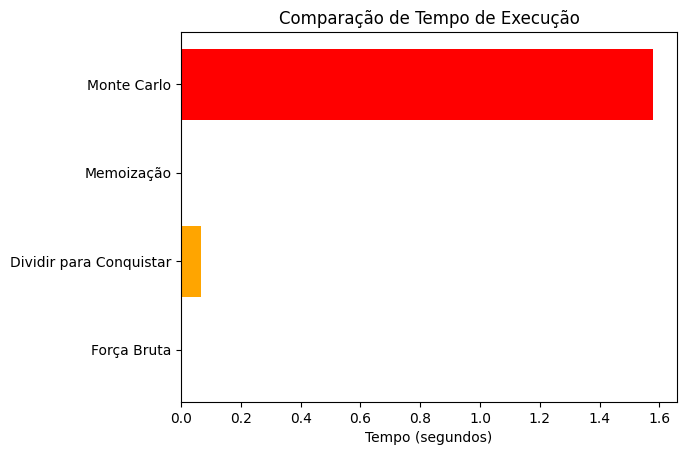

In [23]:
plt.barh(labels, tempos, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Tempo (segundos)')
plt.title('Comparação de Tempo de Execução')
plt.show()